In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
data_path = "~/Desktop/LR_Assignment/dataset/SBAcase.csv"

In [10]:
# Read my data
data = pd.read_csv(data_path)

In [12]:
# Check the dimension of my data
data.shape

(2102, 35)

I tried to examine the first five rows of my dataset to know what it entails

In [ ]:
# Inspect my data from the top
data.value_counts().head()

Selected  LoanNr_ChkDgt  Name                            City             State  Zip    Bank                            BankState  NAICS   ApprovalDate  ApprovalFY  Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  RevLineCr  LowDoc  ChgOffDate  DisbursementDate  DisbursementGross  BalanceGross  MIS_Status  ChgOffPrinGr  GrAppv  SBA_Appv  New  RealEstate  Portion  Recession  daysterm  xx       Default
1         9827804009     TR INVESTMENTS                  EL CAJON         CA     92021  JPMORGAN CHASE BANK NATL ASSOC  IL         531390  16832         2006        32    2      2.0       0          2            1              2           Y          N       18452.0     16860.0           76353              0             CHGOFF      23594         30000   15000     1    0           0.50     1          960       17820.0  1          1
0         1015066002     SUPERIOR BROKERS REALTY         HUNTINGTON PARK  CA     90255  U.S. BANK NATIONAL ASSOCIATION  OH         531210  16841         2006        269   2      1.0       0          2            1              1           0          N       18641.0     16860.0           297500             0             CHGOFF      247074        297500  223125    0    1           0.75     0          8070      24930.0  1          1
          1018975003     SOUTHLAND MGT., CO.             SANTA ANA        CA     92704  BANK OF AMERICA NATL ASSOC      NC         531390  16252         2004        22    5      1.0       0          0            1              1           N          N       18189.0     16283.0           50000              0             CHGOFF      35333         50000   25000     0    0           0.50     0          660       16943.0  1          1
          1077145001     DESERT REALTY & DEVELOPMENT CO  INGLEWOOD        CA     90305  BANK OF AMERICA NATL ASSOC      NC         531210  16350         2005        67    12     1.0       0          0            1              1           N          N       16932.0     16375.0           50000              0             CHGOFF      50000         50000   25000     0    0           0.50     0          2010      18385.0  1          1
          1101815002     Shaky, Inc.                     STUDIO CITY      CA     91604  BANK OF AMERICA NATL ASSOC      NC         531210  16385         2005        34    1      2.0       0          0            1              1           N          N       18004.0     16467.0           12750              0             CHGOFF      8415          10000   5000      1    0           0.50     0          1020      17487.0  1          1
Name: count, dtype: int64

In [ ]:
# Inspect my data from the bottom
data.value_counts().tail()

Selected  LoanNr_ChkDgt  Name                            City              State  Zip    Bank                        BankState  NAICS   ApprovalDate  ApprovalFY  Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  RevLineCr  LowDoc  ChgOffDate  DisbursementDate  DisbursementGross  BalanceGross  MIS_Status  ChgOffPrinGr  GrAppv  SBA_Appv  New  RealEstate  Portion  Recession  daysterm  xx       Default
0         1260605006     Parto Enterprises, Inc.         HUNTINGTON BEACH  CA     92649  BANK OF AMERICA NATL ASSOC  NC         531312  16533         2005        71    12     1.0       0          12           1              1           T          N       16985.0     16556.0           50000              0             CHGOFF      49725         50000   25000     0    0           0.5      0          2130      18686.0  1          1
          1241435008     Los Angeles Properties, Inc. D  TORRANCE          CA     90504  BANK OF AMERICA NATL ASSOC  NC         531210  16517         2005        30    16     1.0       0          16           1              1           N          N       18193.0     16526.0           81937              0             CHGOFF      48632         60000   30000     0    0           0.5      0          900       17426.0  1          1
          1227735008     Esprit Funding                  ANAHEIM           CA     92807  BANK OF AMERICA NATL ASSOC  NC         531210  16506         2005        42    4      1.0       0          4            1              1           N          N       17910.0     16587.0           33500              0             CHGOFF      20953         22000   11000     0    0           0.5      1          1260      17847.0  1          1
          1173345002     Casa Grande Real Estate         SANTA ANA         CA     92701  BANK OF AMERICA NATL ASSOC  NC         531210  16463         2005        42    12     2.0       0          12           1              1           T          N       17868.0     16495.0           20000              0             CHGOFF      10000         10000   5000      1    0           0.5      1          1260      17755.0  1          1
          1168985001     Claudio Gonzalez dba A & A Pro  ADELANTO          CA     92301  BANK OF AMERICA NATL ASSOC  NC         531311  16461         2005        53    2      1.0       1          2            1              1           Y          N       17477.0     16495.0           25000              0             CHGOFF      25000         25000   12500     0    0           0.5      0          1590      18085.0  1          1
Name: count, dtype: int64

In [ ]:
# I randomly check my dataset with sample method chained with value_counts()
data.value_counts().sample(5)

Selected  LoanNr_ChkDgt  Name                           City           State  Zip    Bank                         BankState  NAICS   ApprovalDate  ApprovalFY  Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  RevLineCr  LowDoc  ChgOffDate  DisbursementDate  DisbursementGross  BalanceGross  MIS_Status  ChgOffPrinGr  GrAppv  SBA_Appv  New  RealEstate  Portion  Recession  daysterm  xx       Default
1         7459074000     VACATION PROPERTY MANAGEMENT   TRUCKEE        CA     96161  WELLS FARGO BANK NATL ASSOC  SD         531312  16212         2004        1     10     1.0       1          11           1              1           Y          N       18249.0     16344.0           226612             0             CHGOFF      84172         85000   42500     0    0           0.5      0          30        16374.0  1          1
0         6790654003     BAYSIDE MORTGAGE               HAYWARD        CA     94541  BANK OF AMERICA NATL ASSOC   NC         531210  15992         2004        8     10     1.0       3          10           1              1           Y          N       18407.0     16070.0           65283              0             CHGOFF      30567         50000   25000     0    0           0.5      0          240       16310.0  1          1
          1416315010     AME Property Management, Inc.  PLAYA DEL REY  CA     90293  BANK OF AMERICA NATL ASSOC   NC         531311  16664         2005        59    5      2.0       0          5            0              1           Y          N       17507.0     16709.0           24046              0             CHGOFF      20000         20000   10000     1    0           0.5      0          1770      18479.0  1          1
          2520155004     RUPERTO R  AGATON              LA PUENTE      CA     91744  WELLS FARGO BANK NATL ASSOC  SD         531210  17332         2007        48    2      1.0       1          3            0              1           Y          N       18490.0     17378.0           64391              0             CHGOFF      21412         30000   15000     0    0           0.5      0          1440      18818.0  1          1
1         1878685010     E-Z Homes Real Estate, Inc.    PALO ALTO      CA     94303  BANK OF AMERICA NATL ASSOC   NC         531390  16968         2006        23    3      1.0       3          3            0              1           Y          N       18849.0     16982.0           84349              0             CHGOFF      31833         35000   17500     0    0           0.5      1          690       17672.0  1          1
Name: count, dtype: int64

In [ ]:
# Check for dublicate
data.duplicated().sum()

np.int64(0)

In [ ]:
# I dropped this NeExist column because it is redundant as New column contain the same thing
data.drop(columns='NewExist', axis=1, inplace=True)

In [ ]:
# Renamed the New column to NewExist
data.rename(columns={'New': 'NewExist'}, inplace=True)

In [ ]:
# Getting the columns of the data
data.columns

Index(['Selected', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank',
       'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'NewExist', 'RealEstate', 'Portion', 'Recession', 'daysterm', 'xx',
       'Default'],
      dtype='object')

In [ ]:
# Exploring my data for understanding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Selected           2102 non-null   int64  
 1   LoanNr_ChkDgt      2102 non-null   int64  
 2   Name               2102 non-null   object 
 3   City               2102 non-null   object 
 4   State              2102 non-null   object 
 5   Zip                2102 non-null   int64  
 6   Bank               2099 non-null   object 
 7   BankState          2099 non-null   object 
 8   NAICS              2102 non-null   int64  
 9   ApprovalDate       2102 non-null   int64  
 10  ApprovalFY         2102 non-null   int64  
 11  Term               2102 non-null   int64  
 12  NoEmp              2102 non-null   int64  
 13  CreateJob          2102 non-null   int64  
 14  RetainedJob        2102 non-null   int64  
 15  FranchiseCode      2102 non-null   int64  
 16  UrbanRural         2102 

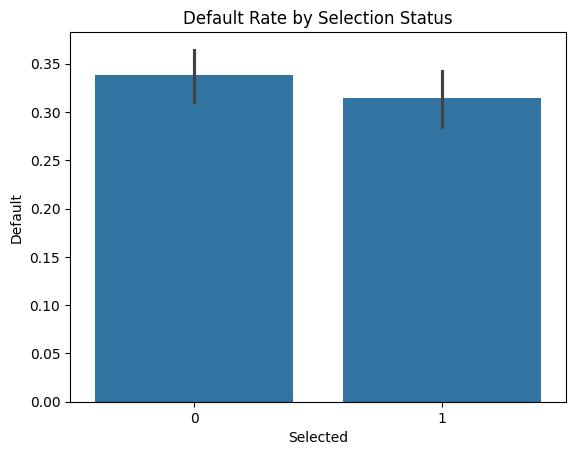

In [ ]:
# I plotted the Selected column to know whether is a relevant feature for my prediction
sns.barplot(x='Selected', y='Default', data=data)
plt.title("Default Rate by Selection Status")
plt.show()

In [ ]:
# I drop columns not needed for prediction
data.drop(labels=['Selected','City', 'Name', 'LoanNr_ChkDgt', 'xx', 'MIS_Status', 'Bank', 'State', 'ChgOffDate', 'ChgOffPrinGr', 'daysterm', 'BalanceGross'], axis=1, inplace=True)

In [ ]:
# Check my columns again to confirm the dropping of irrelevant columns
data.columns

Index(['Zip', 'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term',
       'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementDate', 'DisbursementGross',
       'GrAppv', 'SBA_Appv', 'NewExist', 'RealEstate', 'Portion', 'Recession',
       'Default'],
      dtype='object')

In [ ]:
# I try to check for the categorical variables in my dataset
data.select_dtypes(include='object').head()

,BankState,RevLineCr,LowDoc
0,CA,Y,N
1,CA,Y,N
2,CA,Y,N
3,CA,Y,N
4,CO,0,N


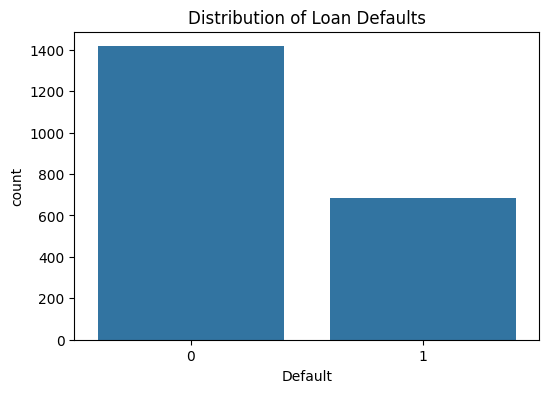

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data.Default, data=data)
plt.title('Distribution of Loan Defaults')
plt.show()

In [ ]:
# check values in my RevLineCr column
data['RevLineCr'].value_counts()

,count
RevLineCr,
Y,737
0,729
N,580
T,54


In [ ]:
# Converted categorical Revolving Line of Credit variable to an integer
data['RevLineCr'] = data['RevLineCr'].map({'Y': 1, 'N': 0, '0': 1, 'T': 0})

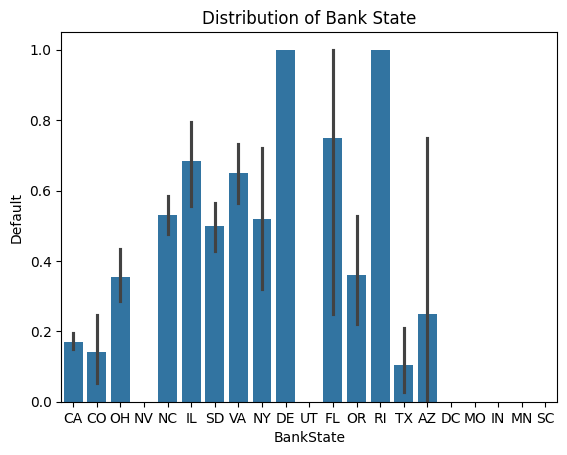

In [ ]:
# Plotted BankState against Default to gain insight
sns.barplot(x='BankState', y='Default', data=data)
plt.title('Distribution of Bank State')
plt.show()

([<matplotlib.axis.XTick at 0x7a89a938e7d0>,
 [Text(0, 0, 'Paid'), Text(1, 0, 'Defaulted')])

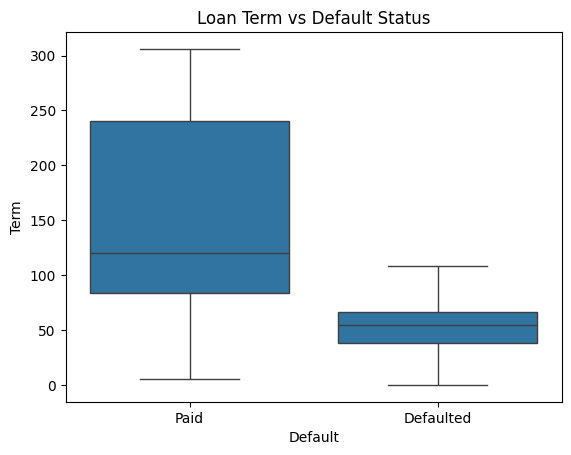

In [ ]:
# Plotted Loar Term vs Default
sns.boxplot(x='Default', y='Term', data=data, showfliers=False)
plt.title('Loan Term vs Default Status')
plt.xticks([0,1], ['Paid','Defaulted'])

([<matplotlib.axis.XTick at 0x7a89a9303f50>,
 [Text(0, 0, 'Paid'), Text(1, 0, 'Defaulted')])

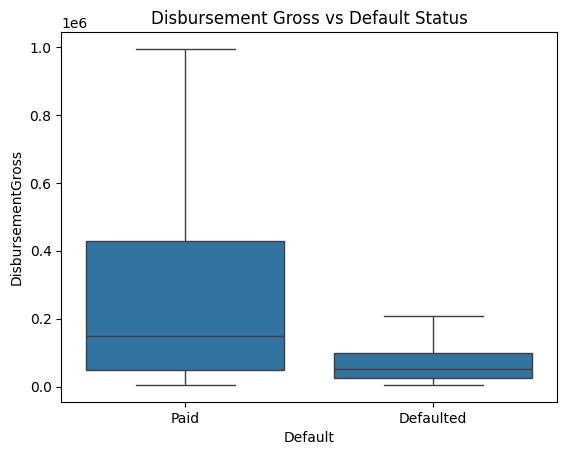

In [ ]:
# Plotted Disbursment Gross vs Default
sns.boxplot(x='Default', y='DisbursementGross', data=data, showfliers=False)
plt.title('Disbursement Gross vs Default Status')
plt.xticks([0,1], ['Paid','Defaulted'])

In [ ]:
# Get top 10 largest bank state from bank state column
top_states = data['BankState'].value_counts().nlargest(10).index


In [ ]:
# Impute the categorical variable BankSate
data['BankState'] = data['BankState'].apply(lambda x: x if x in top_states else 'Other')
data = pd.get_dummies(data, columns=['BankState'], drop_first=True, dtype=int)

In [ ]:
# Inspect my data again
data.head()

,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,...,BankState_CO,BankState_IL,BankState_NC,BankState_NY,BankState_OH,BankState_OR,BankState_Other,BankState_SD,BankState_TX,BankState_VA
0,92801,532420,15074,2001,36,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,90505,531210,15130,2001,56,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,92103,531210,15188,2001,36,10,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,92108,531312,15719,2003,36,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,91345,531390,16840,2006,240,65,3,65,1,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Convert Low Documentation Loan variable to numeric
data['LowDoc'] = data['LowDoc'].map({'Y': 1, 'N': 0})

In [ ]:
# Then count it again to see the effect
data['LowDoc'].value_counts()

,count
LowDoc,
0.0,2053
1.0,41


In [ ]:
# Exploring my data for understanding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zip                2102 non-null   int64  
 1   NAICS              2102 non-null   int64  
 2   ApprovalDate       2102 non-null   int64  
 3   ApprovalFY         2102 non-null   int64  
 4   Term               2102 non-null   int64  
 5   NoEmp              2102 non-null   int64  
 6   CreateJob          2102 non-null   int64  
 7   RetainedJob        2102 non-null   int64  
 8   FranchiseCode      2102 non-null   int64  
 9   UrbanRural         2102 non-null   int64  
 10  RevLineCr          2100 non-null   float64
 11  LowDoc             2094 non-null   float64
 12  DisbursementDate   2099 non-null   float64
 13  DisbursementGross  2102 non-null   int64  
 14  GrAppv             2102 non-null   int64  
 15  SBA_Appv           2102 non-null   int64  
 16  NewExist           2102 

In [ ]:
# Getting to know how many missing values I have in the data
data.isnull().sum()

,0
Zip,0
NAICS,0
ApprovalDate,0
ApprovalFY,0
Term,0
NoEmp,0
CreateJob,0
RetainedJob,0
FranchiseCode,0
UrbanRural,0


In [ ]:
# Dropping columns with missing values less than 0.05% of the dataset
threshold = len(data) * 0.05
cols_to_drop = data.columns[data.isna().sum() < threshold]

In [ ]:
# Dropped missing values inplace
data.dropna(subset=cols_to_drop, inplace=True)

In [ ]:
# Check my data again to verify no missing values
data.isna().sum()

,0
Zip,0
NAICS,0
ApprovalDate,0
ApprovalFY,0
Term,0
NoEmp,0
CreateJob,0
RetainedJob,0
FranchiseCode,0
UrbanRural,0


In [ ]:
# Inspect my data again
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2089 entries, 0 to 2100
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zip                2089 non-null   int64  
 1   NAICS              2089 non-null   int64  
 2   ApprovalDate       2089 non-null   int64  
 3   ApprovalFY         2089 non-null   int64  
 4   Term               2089 non-null   int64  
 5   NoEmp              2089 non-null   int64  
 6   CreateJob          2089 non-null   int64  
 7   RetainedJob        2089 non-null   int64  
 8   FranchiseCode      2089 non-null   int64  
 9   UrbanRural         2089 non-null   int64  
 10  RevLineCr          2089 non-null   float64
 11  LowDoc             2089 non-null   float64
 12  DisbursementDate   2089 non-null   float64
 13  DisbursementGross  2089 non-null   int64  
 14  GrAppv             2089 non-null   int64  
 15  SBA_Appv           2089 non-null   int64  
 16  NewExist           2089 non-n

In [ ]:
# Defined my Predictor and the Target
X = data.drop('Default', axis=1)
y = data['Default']

In [ ]:
# Split my data to both train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Scaled my data to have mean of zero and standard deviation of one
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Instantiate Logistic Regression model and fit it to my training data
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Make prediction on test data
logreg_pred = logreg.predict(X_test_scaled)

In [ ]:
# Evaluate the accuracy of my prediction
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Accuracy of Logistic Regression:", logreg_accuracy)

Accuracy of Logistic Regression: 0.8947368421052632


In [ ]:
# Compute confusion matrix
logreg_confusion_matrix = confusion_matrix(y_test, logreg_pred)
print("Confusion Matrix of Logistic Regression:\n", logreg_confusion_matrix)

Confusion Matrix of Logistic Regression:
 [[263  19]
 [ 25 111]]


In [ ]:
# Compute precision, recall, and f1-score
logreg_classification_report = classification_report(y_test, logreg_pred)
print("Classification Report of Logistic Regression:\n", logreg_classification_report)

Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       282
           1       0.85      0.82      0.83       136

    accuracy                           0.89       418
   macro avg       0.88      0.87      0.88       418
weighted avg       0.89      0.89      0.89       418



In [ ]:
# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nThese are the Top Predictive Features:\n")
print(importance.head(15))


These are the Top Predictive Features:

             Feature  Coefficient
4               Term    -4.161669
14            GrAppv     2.524907
17        RealEstate     2.351907
15          SBA_Appv    -2.150622
2       ApprovalDate     1.953231
12  DisbursementDate    -1.613920
3         ApprovalFY     0.708547
5              NoEmp    -0.580732
18           Portion     0.455970
1              NAICS    -0.377890
22      BankState_NC     0.366226
10         RevLineCr    -0.346075
25      BankState_OR     0.333302
27      BankState_SD     0.309461
21      BankState_IL     0.228360
